In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Music\malcious\urldata.csv", encoding='latin-1')  

In [4]:
df

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0.0
1,1,https://www.youtube.com,benign,0.0
2,2,https://www.facebook.com,benign,0.0
3,3,https://www.baidu.com,benign,0.0
4,4,https://www.wikipedia.org,benign,0.0
...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1.0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1.0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1.0
450174,450174,http://atualizapj.com/,malicious,1.0


In [5]:
df.head(10)

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0.0
1,1,https://www.youtube.com,benign,0.0
2,2,https://www.facebook.com,benign,0.0
3,3,https://www.baidu.com,benign,0.0
4,4,https://www.wikipedia.org,benign,0.0
5,5,https://www.reddit.com,benign,0.0
6,6,https://www.yahoo.com,benign,0.0
7,7,https://www.google.co.in,benign,0.0
8,8,https://www.qq.com,benign,0.0
9,9,https://www.amazon.com,benign,0.0


In [6]:
#Removing the unnamed columns as it is not necesary.
df = df.drop('Unnamed: 0',axis=1)

In [7]:
df.head()

,url,label,result
0,https://www.google.com,benign,0.0
1,https://www.youtube.com,benign,0.0
2,https://www.facebook.com,benign,0.0
3,https://www.baidu.com,benign,0.0
4,https://www.wikipedia.org,benign,0.0


In [8]:
df.shape

(450176, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   url     450176 non-null  object 
 1   label   450176 non-null  object 
 2   result  450174 non-null  float64
dtypes: float64(1), object(2)
memory usage: 10.3+ MB


In [10]:
df.isnull().sum()

url       0
label     0
result    2
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [13]:
df['url_length'] = df['url'].apply(lambda i: len(str(i)))

In [14]:
df

,url,label,result,url_length
0,https://www.google.com,benign,0.0,22
1,https://www.youtube.com,benign,0.0,23
2,https://www.facebook.com,benign,0.0,24
3,https://www.baidu.com,benign,0.0,21
4,https://www.wikipedia.org,benign,0.0,25
...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1.0,43
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1.0,159
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1.0,147
450174,http://atualizapj.com/,malicious,1.0,22


In [15]:
def get_hostname_length(url):
    try:
        parsed_url = urlparse(url)
        netloc = parsed_url.netloc
        if netloc not in ['.', '']:
            return len(netloc)
        else:
            return 0
    except ValueError:
        return 0  # Or any other handling for invalid URLs

df['hostname_length'] = df['url'].apply(get_hostname_length)

In [16]:
from urllib.parse import urlparse

def get_path_length(url):
    """
    Calculates the length of the path in a URL, handling invalid URLs.

    Args:
        url (str): The URL to analyze.

    Returns:
        int: The length of the path or 0 if the URL is invalid.
    """
    try:
        return len(urlparse(url).path)  # Get path and its length
    except ValueError:
        return 0  # If urlparse fails (invalid URL), return 0

# Apply the function to create the 'path_length' column
df['path_length'] = df['url'].apply(get_path_length)

In [17]:
def fd_length(url):
    """
    Calculates the length of the first directory in a URL path.

    Handles invalid URLs by returning 0.

    Args:
        url (str): The URL to analyze.

    Returns:
        int: The length of the first directory in the path, or 0 if the URL
              is invalid or has no directories.
    """
    try:
        urlpath = urlparse(url).path
        # Splitting the path by '/' and ensuring at least 2 elements
        # (1st element is empty, 2nd is the first directory)
        if len(urlpath.split('/')) >= 2:
            return len(urlpath.split('/')[1])
        else:
            return 0  # If no directories are found (e.g., root path '/')
    except ValueError:
        return 0  # Handles the case where urlparse fails on an invalid URL

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [18]:
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [19]:
df.head(12)

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0.0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0.0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0.0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0.0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0.0,25,17,0,0,org,3
5,https://www.reddit.com,benign,0.0,22,14,0,0,com,3
6,https://www.yahoo.com,benign,0.0,21,13,0,0,com,3
7,https://www.google.co.in,benign,0.0,24,16,0,0,co.in,5
8,https://www.qq.com,benign,0.0,18,10,0,0,com,3
9,https://www.amazon.com,benign,0.0,22,14,0,0,com,3


In [20]:
df = df.drop("tld", axis=1)

In [21]:
df

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,benign,0.0,22,14,0,0,3
1,https://www.youtube.com,benign,0.0,23,15,0,0,3
2,https://www.facebook.com,benign,0.0,24,16,0,0,3
3,https://www.baidu.com,benign,0.0,21,13,0,0,3
4,https://www.wikipedia.org,benign,0.0,25,17,0,0,3
...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1.0,43,11,25,8,3
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1.0,159,13,139,2,3
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1.0,147,13,127,2,3
450174,http://atualizapj.com/,malicious,1.0,22,14,1,0,3


In [22]:
df['count-'] = df['url'].apply(lambda i: i.count('-'))

In [23]:
df['count@'] = df['url'].apply(lambda i: i.count('@'))

In [24]:
df['count?'] = df['url'].apply(lambda i: i.count('?'))

In [25]:
df['count%'] = df['url'].apply(lambda i: i.count('%'))

In [26]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))

In [27]:
df['count='] = df['url'].apply(lambda i: i.count('='))

In [28]:
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

In [29]:
df['count-https'] = df['url'].apply(lambda i : i.count('https'))

In [30]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))

In [31]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [32]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [33]:
from urllib.parse import urlparse

def no_of_dir(url):
    """
    Calculates the number of directories in a URL path,
    handling invalid URLs gracefully.

    Args:
        url (str): The URL to analyze.

    Returns:
        int: The number of directories in the path, or 0 if the URL is
              invalid or has no directories.
    """
    try:
        urldir = urlparse(url).path  # Parse the URL and get the path
        return urldir.count('/')  # Count the occurrences of '/'
    except ValueError:
        return 0  # Return 0 for invalid URLs

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [34]:
df.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0.0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0.0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0.0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0.0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0.0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0


In [35]:
import re

In [36]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [37]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [38]:
df.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0.0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0.0,23,15,0,0,3,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0.0,24,16,0,0,3,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0.0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0.0,25,17,0,0,3,0,0,...,2,0,1,1,1,0,20,0,1,1


<AxesSubplot:>

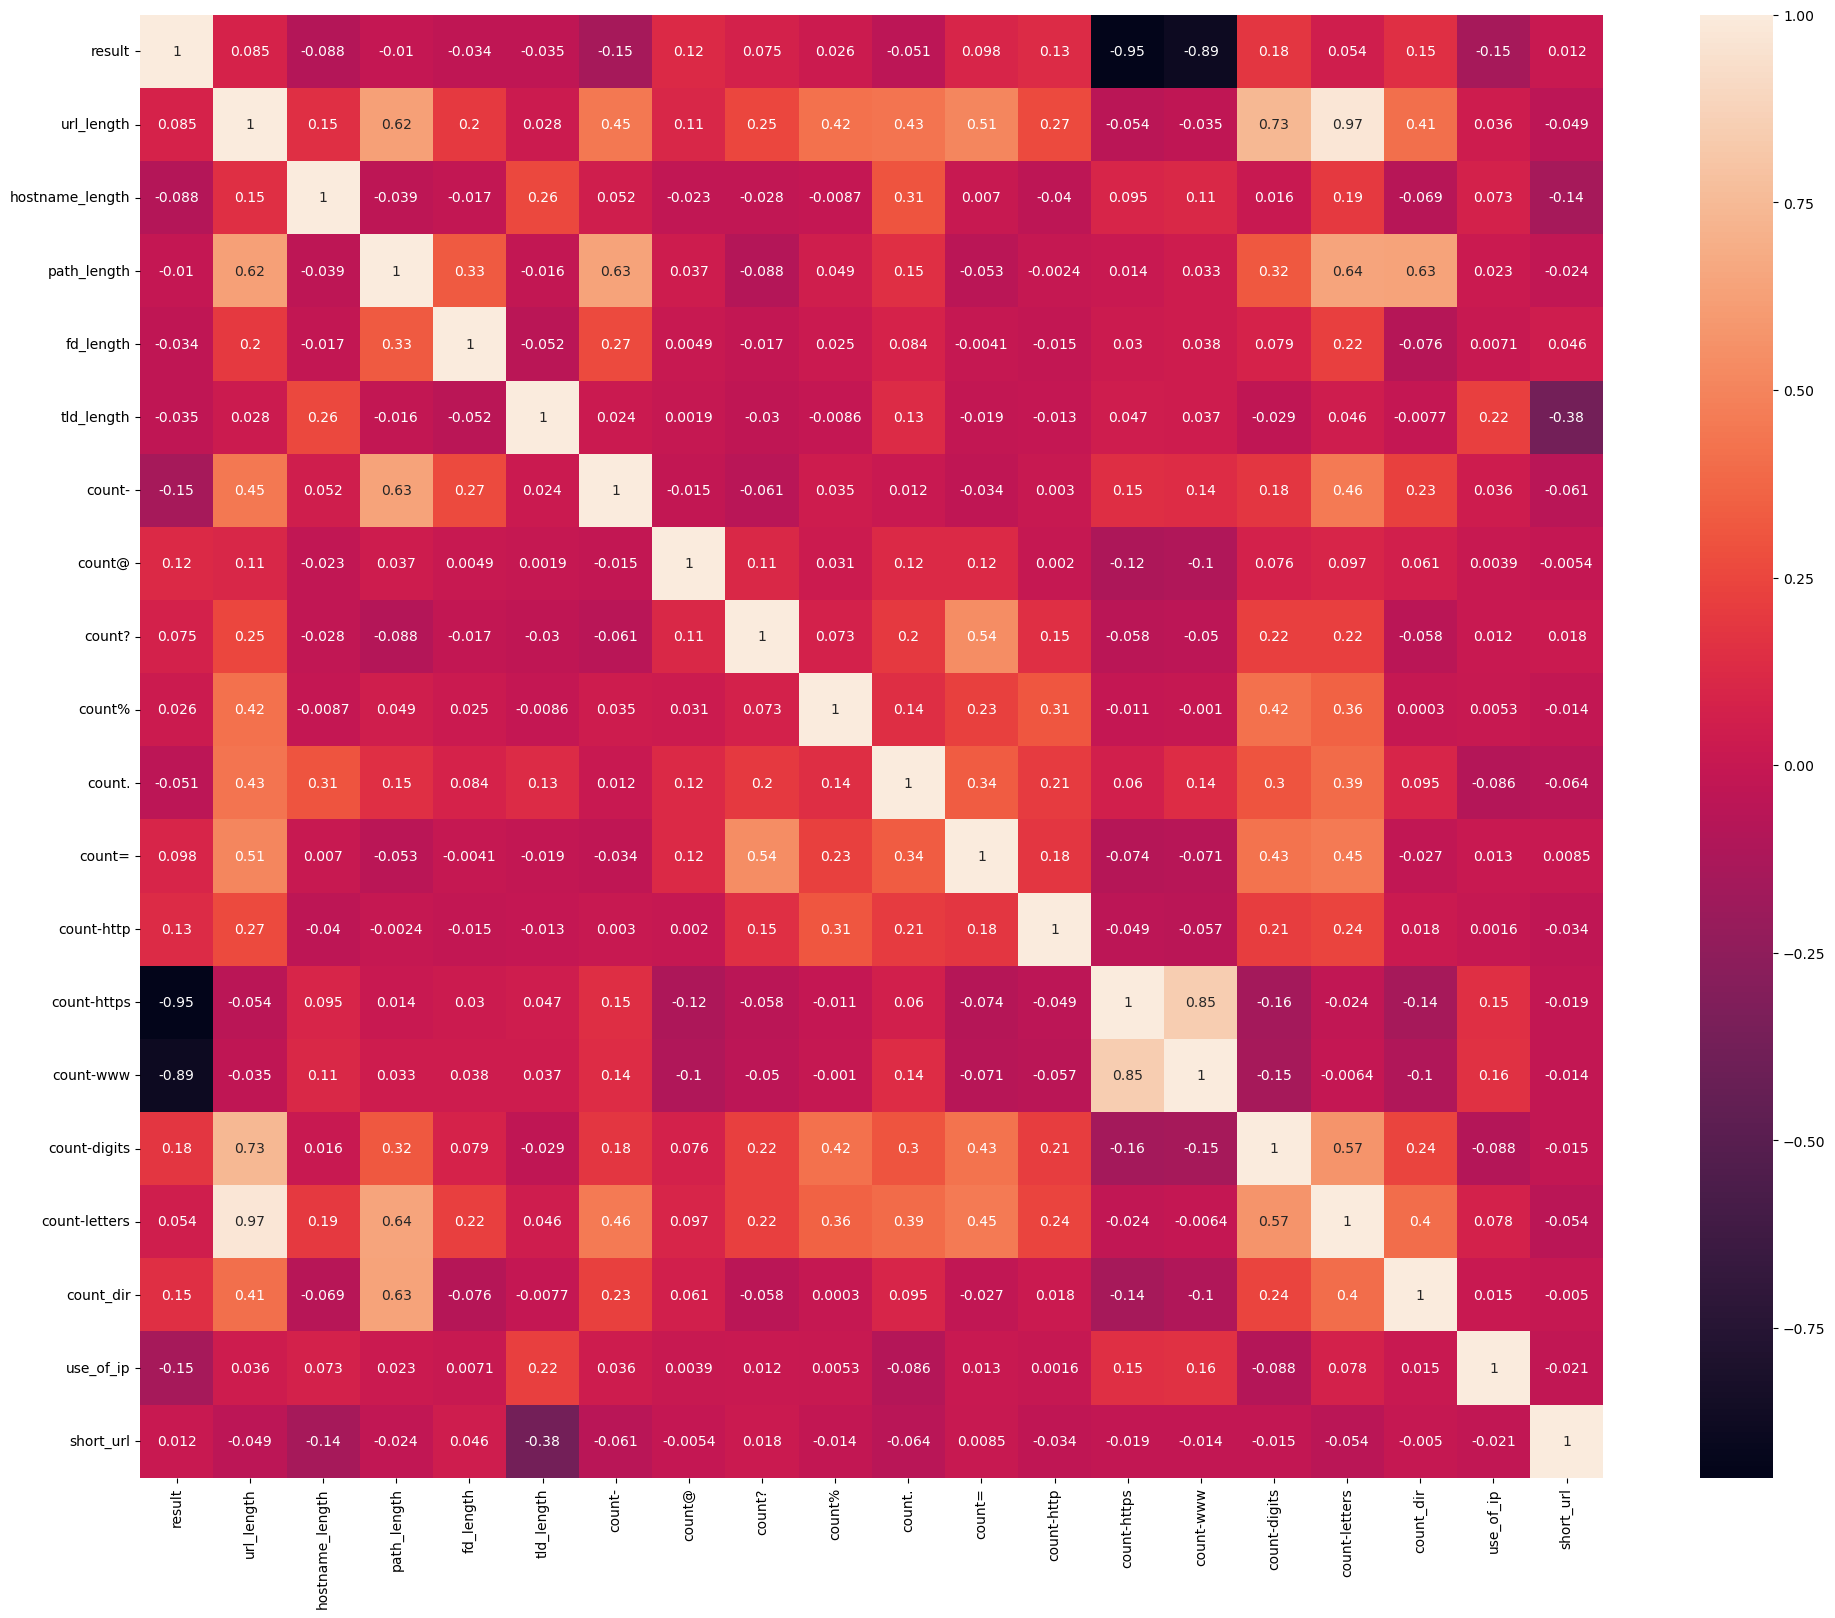

In [39]:
#Heatmap
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=np.number)
corrmat = numeric_df.corr()

f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot=True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

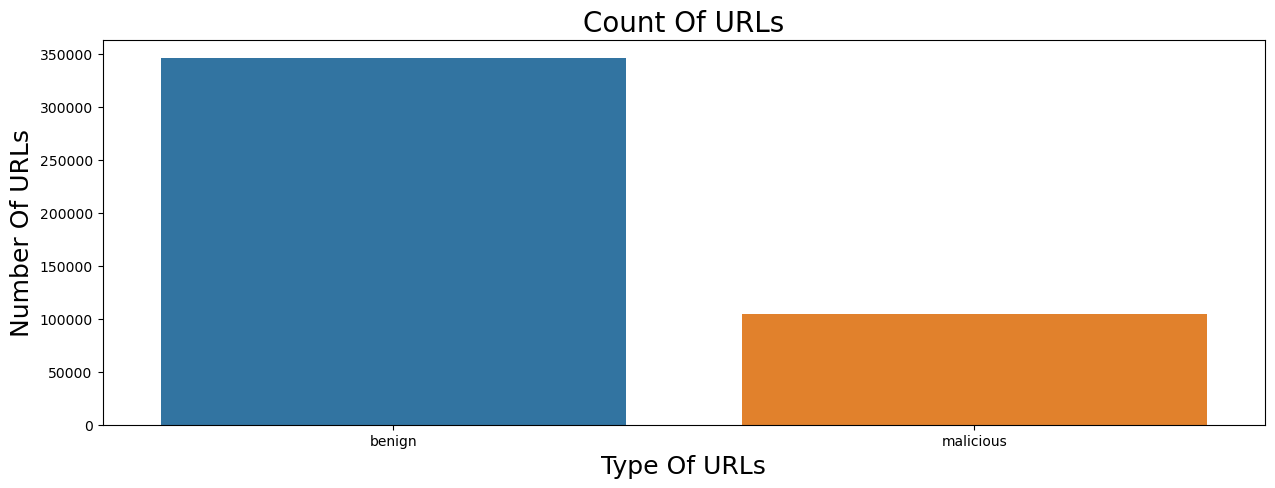

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=df)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [41]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(df[df['label']=='malicious'])/len(df['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(df[df['label']=='benign'])/len(df['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


(0.0, 1000.0)

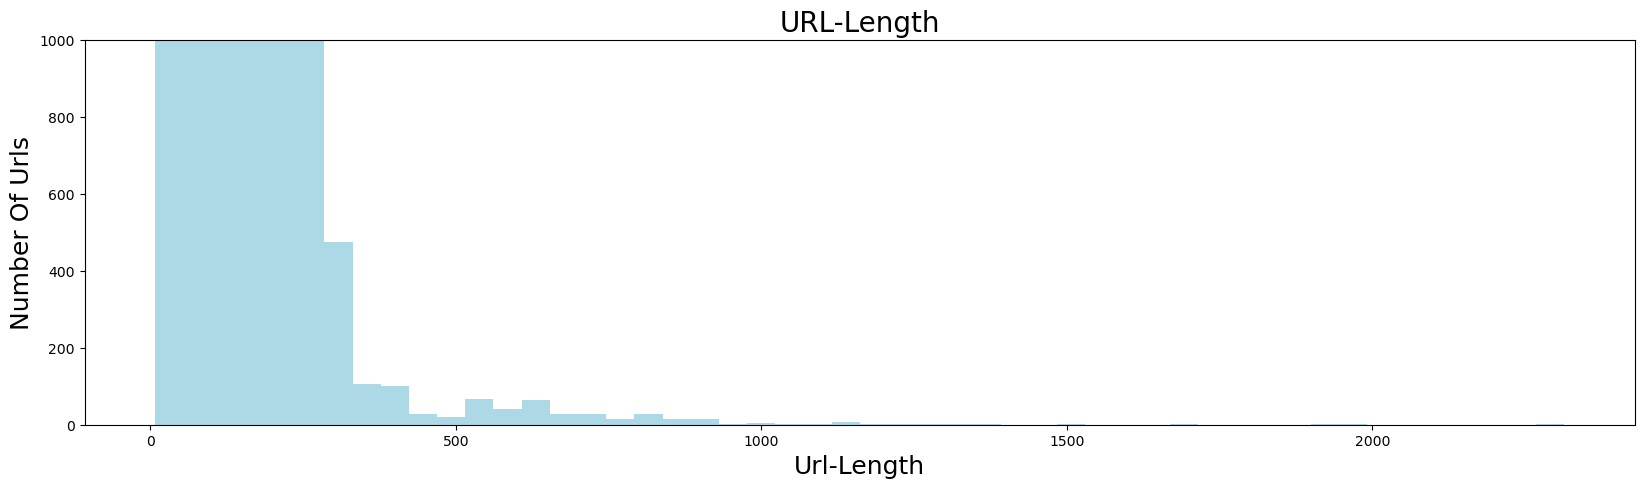

In [42]:
plt.figure(figsize=(20,5))
plt.hist(df['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

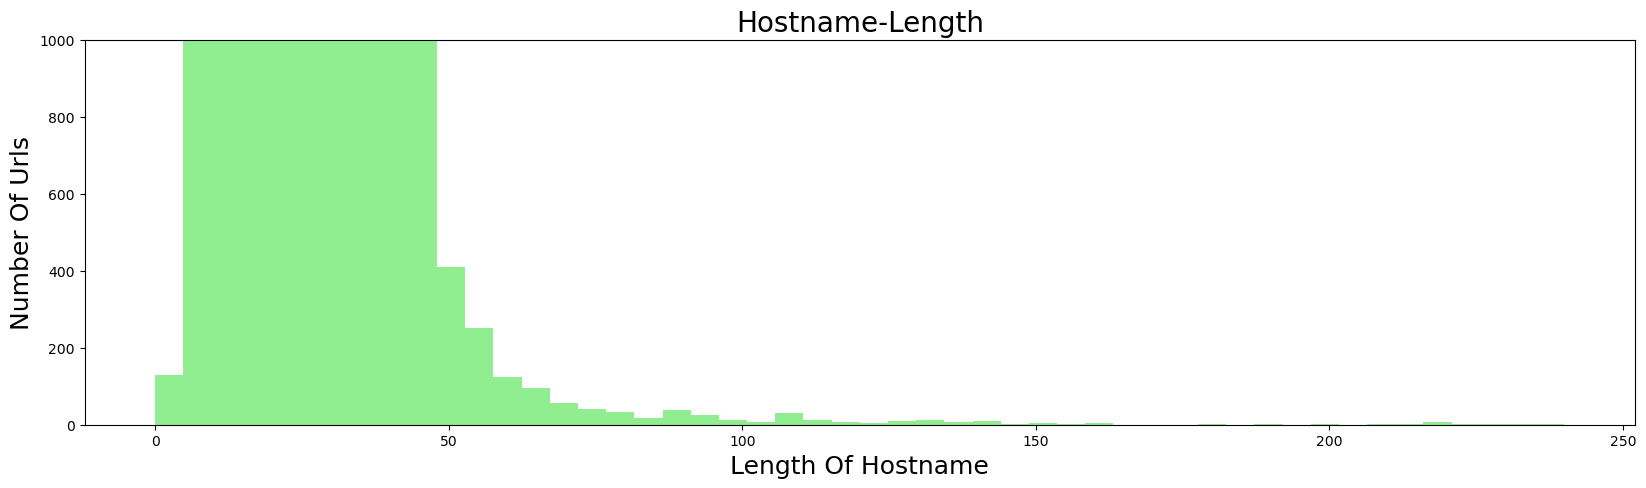

In [43]:
plt.figure(figsize=(20,5))
plt.hist(df['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

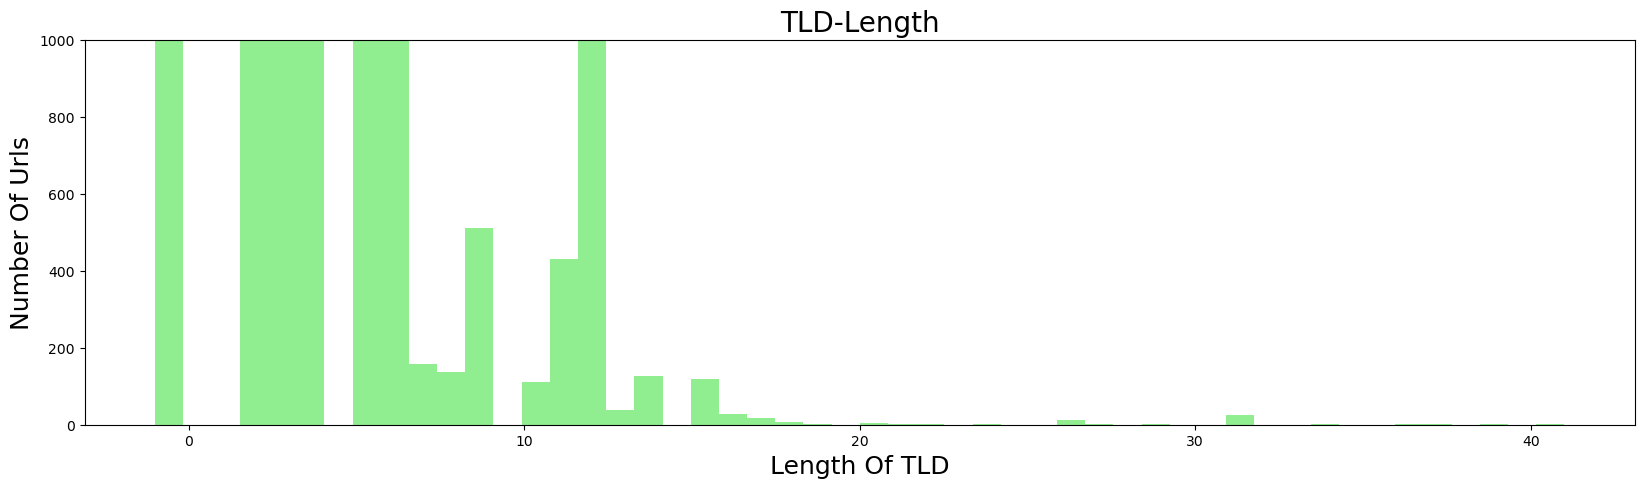

In [44]:
plt.figure(figsize=(20,5))
plt.hist(df['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

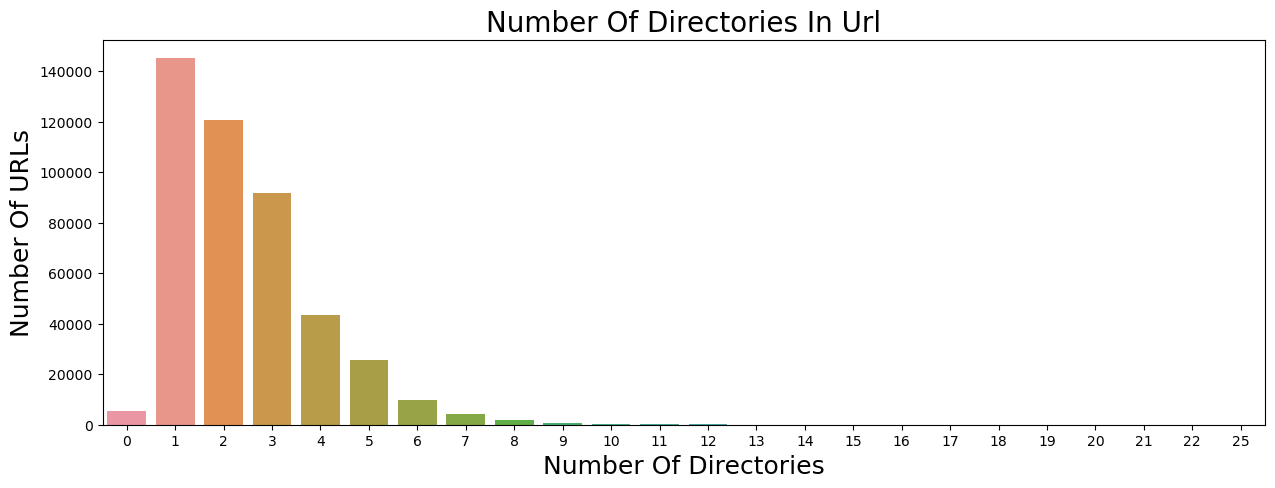

In [45]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=df)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

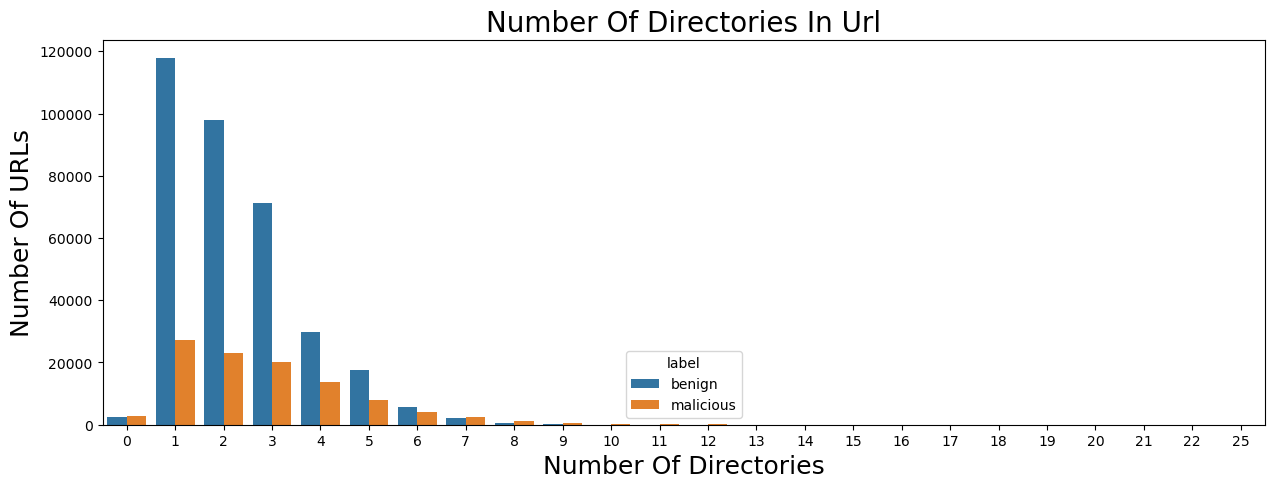

In [46]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=df,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [47]:
x = df[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]
y = df['result']

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

[0]	validation_0-logloss:0.50608	validation_1-logloss:0.50699
[100]	validation_0-logloss:0.01787	validation_1-logloss:0.01844
[200]	validation_0-logloss:0.01137	validation_1-logloss:0.01269
[300]	validation_0-logloss:0.01044	validation_1-logloss:0.01229
[400]	validation_0-logloss:0.00965	validation_1-logloss:0.01206
[500]	validation_0-logloss:0.00899	validation_1-logloss:0.01198
[600]	validation_0-logloss:0.00855	validation_1-logloss:0.01192
[700]	validation_0-logloss:0.00802	validation_1-logloss:0.01187
[800]	validation_0-logloss:0.00762	validation_1-logloss:0.01184
[900]	validation_0-logloss:0.00733	validation_1-logloss:0.01186
[999]	validation_0-logloss:0.00697	validation_1-logloss:0.01188
AUC on Test data is 0.997324845615349
AUC on Train data is 0.9981858839558096
---------------------------


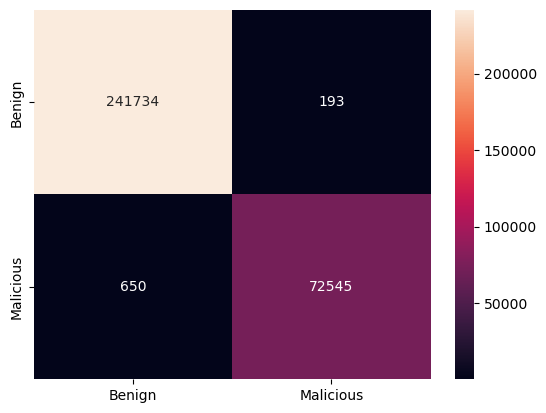

In [49]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.04,random_state=1)
model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], verbose=100)

import pickle
filename = r'C:\Users\HP\OneDrive\Music\malcious\X_gb_mal.pkl'
pickle.dump(model, open(filename, 'wb'))

pred_test =model.predict(x_test)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = model.predict(x_train)
train_accuracy =accuracy_score(y_train,pred_train)

print("AUC on Test data is " +str(accuracy_score(y_test,pred_test)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")
# Code for drawing seaborn heatmaps
class_names =['Benign','Malicious']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [50]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred_test)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    241927
         1.0       1.00      0.99      0.99     73195

    accuracy                           1.00    315122
   macro avg       1.00      1.00      1.00    315122
weighted avg       1.00      1.00      1.00    315122



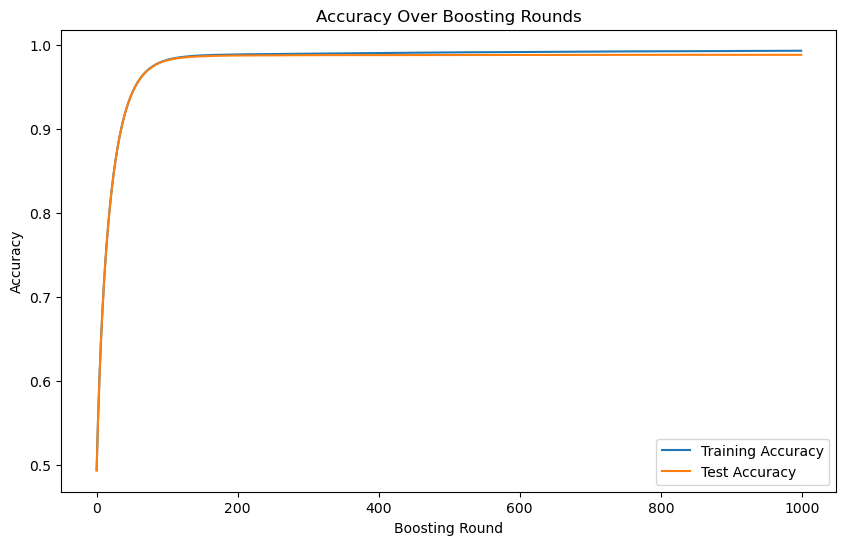

In [51]:
# Extract the evaluation results
results = model.evals_result()

# Plotting training accuracy
train_error = results['validation_0']['logloss']
x_axis = range(0, len(train_error))
test_error = results['validation_1']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(x_axis, 1 - np.array(train_error), label='Training Accuracy')
plt.plot(1 - np.array(test_error), label='Test Accuracy')
plt.xlabel('Boosting Round')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Boosting Rounds')
plt.legend()
plt.show()



[LightGBM] [Info] Number of positive: 31242, number of negative: 103810
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 135052, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.231333 -> initscore=-1.200799
[LightGBM] [Info] Start training from score -1.200799
Accuracy on Test data is 0.9972708982552789
Accuracy on Train data is 0.9993706128009952
---------------------------


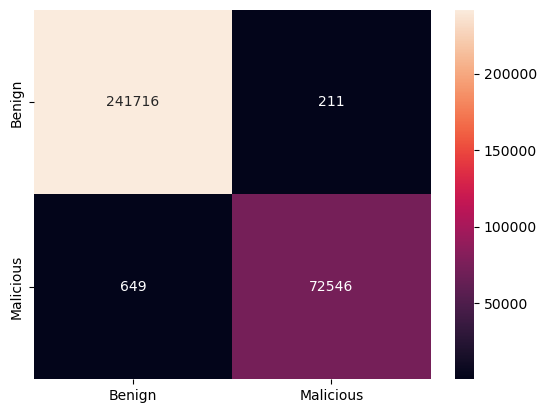

In [52]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define the LightGBM model
model1 = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.04, random_state=1)

# Train the model
model1.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)])

# Save the trained model using pickle
import pickle
filename = r'C:\Users\HP\OneDrive\Music\malcious\LGB_mal.pkl'
pickle.dump(model1, open(filename, 'wb'))

# Generate predictions on the test data
pred_test1 = model1.predict(x_test)
test_accuracy = accuracy_score(y_test, pred_test)

# Generate predictions on the training data
pred_train1 = model1.predict(x_train)
train_accuracy = accuracy_score(y_train, pred_train)

# Print accuracy scores
print("Accuracy on Test data is " + str(accuracy_score(y_test, pred_test1)))
print("Accuracy on Train data is " + str(accuracy_score(y_train, pred_train1)))

# Print confusion matrix heatmap
print("---------------------------")
class_names = ['Benign', 'Malicious']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test1.round()), index=class_names, columns=class_names)
fig = plt.figure()
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


In [53]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred_test1)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    241927
         1.0       1.00      0.99      0.99     73195

    accuracy                           1.00    315122
   macro avg       1.00      1.00      1.00    315122
weighted avg       1.00      1.00      1.00    315122



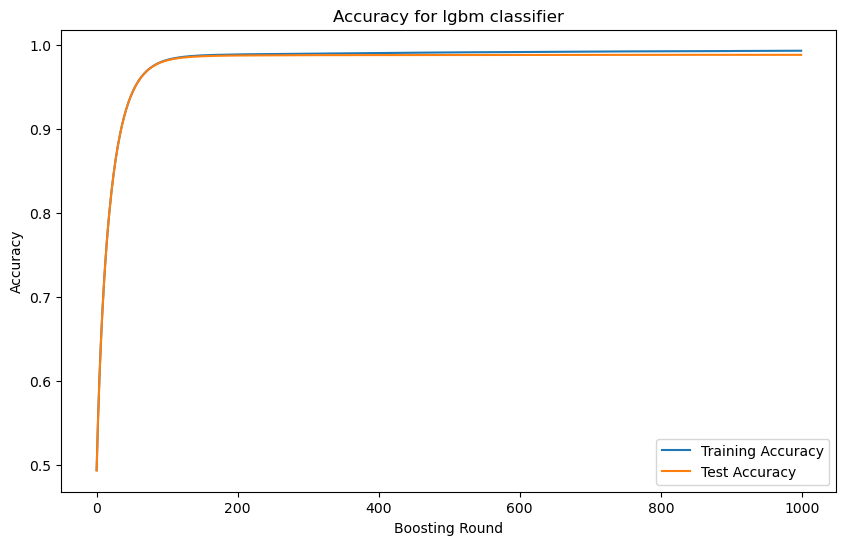

In [54]:
# Extract the evaluation results
results = model.evals_result()

# Plotting training accuracy
train_error = results['validation_0']['logloss']
x_axis = range(0, len(train_error))
test_error = results['validation_1']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(x_axis, 1 - np.array(train_error), label='Training Accuracy')
plt.plot(1 - np.array(test_error), label='Test Accuracy')
plt.xlabel('Boosting Round')
plt.ylabel('Accuracy')
plt.title('Accuracy for lgbm classifier')
plt.legend()
plt.show()